### EDA Case Study 1

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import math
from prettytable import PrettyTable

import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud
import pylab
from scipy.stats import probplot, kstest, boxcox
import statsmodels.api as sm
import pylab as py

[nltk_data] Downloading package stopwords to /home/nlp-ml-
[nltk_data]     spark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nlp-ml-
[nltk_data]     spark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data Loading and data informations

In [3]:
df_train = pd.read_csv('data/train.tsv', sep='\t')

In [4]:
df_train.shape

(1482535, 8)

In [5]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [6]:
df_train.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...
1482534,1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,NaN,22.0,0,"New with tag, red with sparkle. Firm price, no..."


In [7]:
df_train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

#### Checking Null Data Counts

In [8]:
print("Train ID: ", df_train['train_id'].isnull().sum())
print("Product Name: ", df_train['name'].isnull().sum())
print("Item Condition: ", df_train['item_condition_id'].isnull().sum())
print("Category Name: ", df_train['category_name'].isnull().sum())
print("Brand Name: ", df_train['brand_name'].isnull().sum())
print("Shipping Status: ", df_train['shipping'].isnull().sum())
print("Item Description: ", df_train['item_description'].isnull().sum())
print("Price: ", df_train['price'].isnull().sum())

Train ID:  0
Product Name:  0
Item Condition:  0
Category Name:  6327
Brand Name:  632682
Shipping Status:  0
Item Description:  4
Price:  0


#### Observation: There is large number ot category and brand names which have null as value

#### Checking Blank Data Counts

In [9]:
# Reference for empty string: https://stackoverflow.com/questions/49677060/pandas-count-empty-strings-in-a-column
print("Train ID",len(df_train[df_train['train_id'] == '']))
print("Product Name: ", len(df_train[df_train['name']== '']) )
print("Item Condition: ", len(df_train[df_train['item_condition_id']== '']) )
print("Category Name: ", len(df_train[df_train['category_name']== '']) )
print("Brand Name: ", len(df_train[df_train['brand_name']== '']) )
print("Shipping Status: ", len(df_train[df_train['shipping']== '']) )
print("Item Description: ", len(df_train[df_train['item_description']== '']) )
print("Price: ", len(df_train[df_train['price']== '']) )


Train ID 0
Product Name:  0
Item Condition:  0
Category Name:  0
Brand Name:  0
Shipping Status:  0
Item Description:  0
Price:  0


#### Observation: There is no item with empty strings

In [10]:
print("Item Description where no description present: ", (df_train[df_train['item_description'] == 'No description yet']).shape[0])

Item Description where no description present:  82489


#### Percentage of null values(based on above findings):

In [11]:
print("Category Name:", (df_train['category_name'].isna().sum()/(df_train.shape[0])*100))
print("Brand Name:", (df_train['brand_name'].isna().sum()/(df_train.shape[0])*100))
print("Item Description:", (df_train[df_train['item_description'] == 'No description yet']).shape[0]/(df_train.shape[0])*100)


Category Name: 0.42676901388500105
Brand Name: 42.675687251902986
Item Description: 5.564050764400165


###### NOTE: As per the business probelm we need to predict the price accurately and reduce the error(RMSLE) so that prediction price range is very less. Therefore the price feature takes more precedence that others.

### EDA on price(output variable)

#### Basic Statistics of Price

In [12]:
df_train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

#### Observation : There is huge variation of price in the range to 75% to 100% range. Need to analyze by plotting displot and check checking skewness
References:

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/4173/code-walkthrough-probability-and-statistics-i/2/module-2-data-science-exploratory-data-analysis-and-data-visualization

https://www.digitalocean.com/community/tutorials/seaborn-distplot

Also we can check percentile based price values on range wise

Reference : AAIC Case Study of StackOverflow

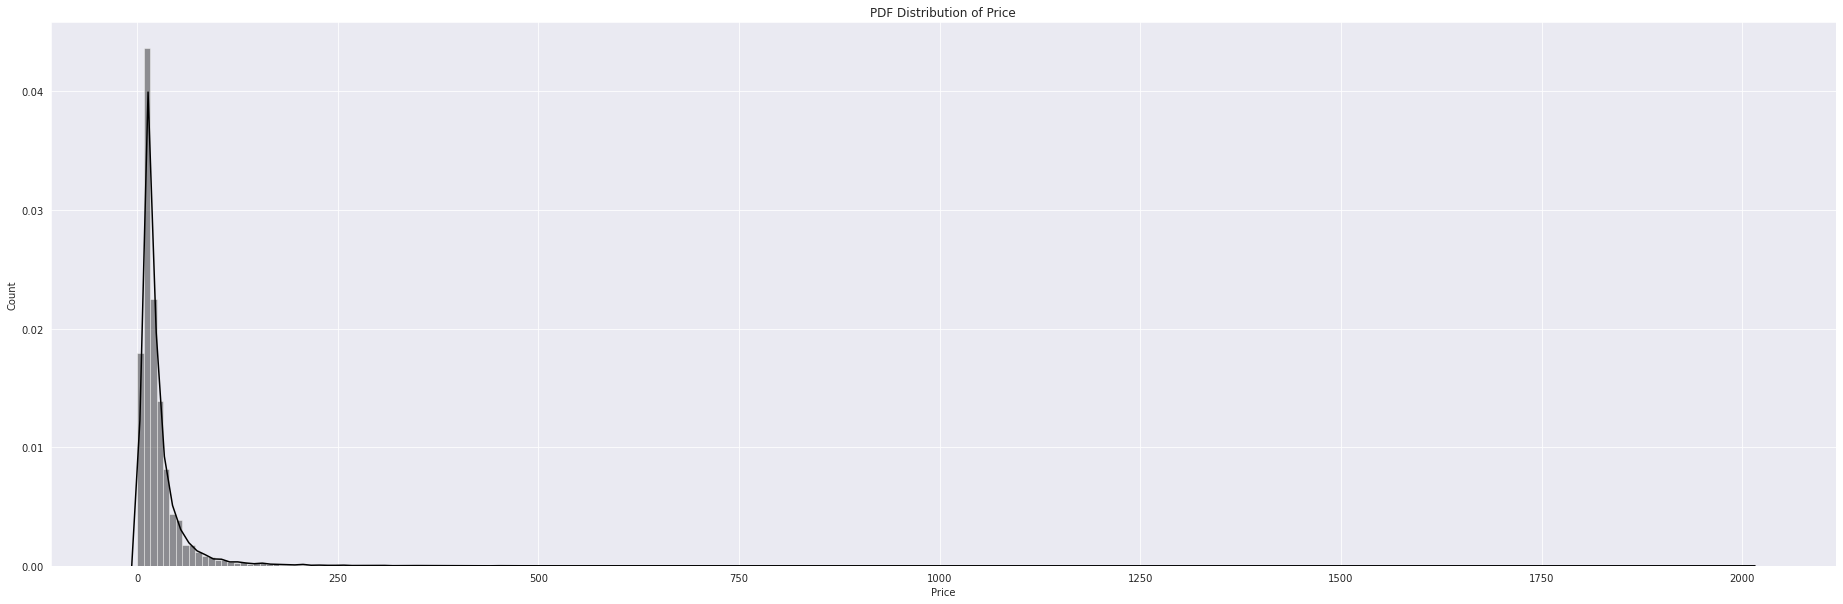

In [13]:
res = pd.Series(np.array(df_train['price']))
sn.set_style("darkgrid")
plt.figure(figsize=(32,10))
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("PDF Distribution of Price")
res = sn.distplot(res,kde=True,bins=250,color="black")
plt.show()

#### Observation : 
1. The above distplot confirms that the price distribution is heavily skewed towards left. 
2. Therefore we need to normalize the data and recheck the distribution again. The best techinque is to apply log

Reference :    https://www.statology.org/transform-data-in-python/

We will also add 1 to price to avoid undefined value on post transformation to handle undefined error

In [14]:
log_price = np.log(df_train['price']+1)

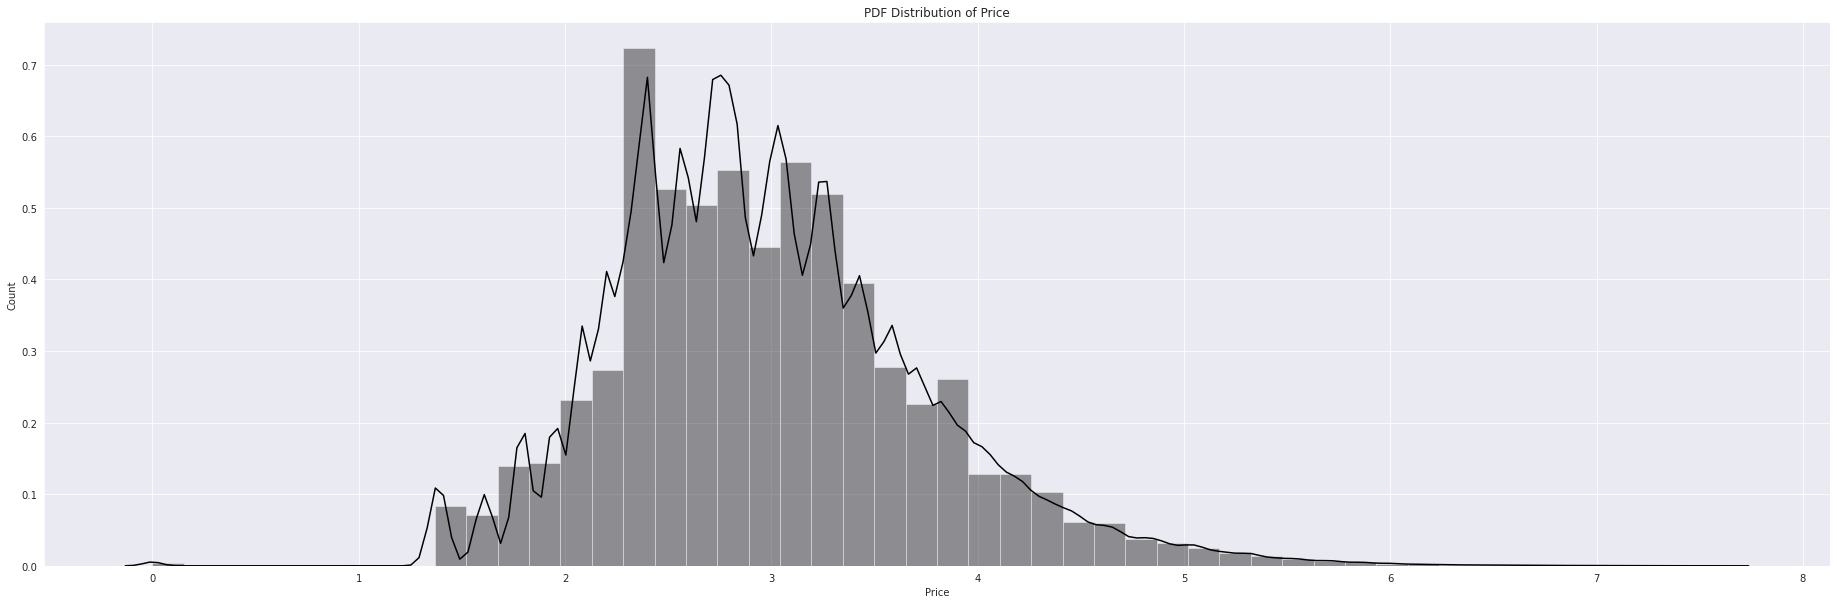

In [15]:
sn.set_style("darkgrid")
plt.figure(figsize=(32,10))
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("PDF Distribution of Price")
res = sn.distplot(pd.Series(np.array(log_price)),kde=True,bins=50,color="black")
plt.show()

#### Observation : 
1. The above distplot confirms that the price distribution is near to gaussian, but curve is neither smooth nor skewed.
Now let apply QQ plot to check the normality. 

Reference :  Notebook of https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/4173/code-walkthrough-probability-and-statistics-i/2/module-2-data-science-exploratory-data-analysis-and-data-visualization

Base Reference to find details of shape by refering to baseline shapes https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html

From now onwards we will consider df_train['log_price'] and y_train as df_train['price']+1
We will drop df_train['price'] before feeding the data to model

In [19]:
df_train['log_price'] = np.log(df_train['price']+1)
y_train = np.log(df_train['price']+1)

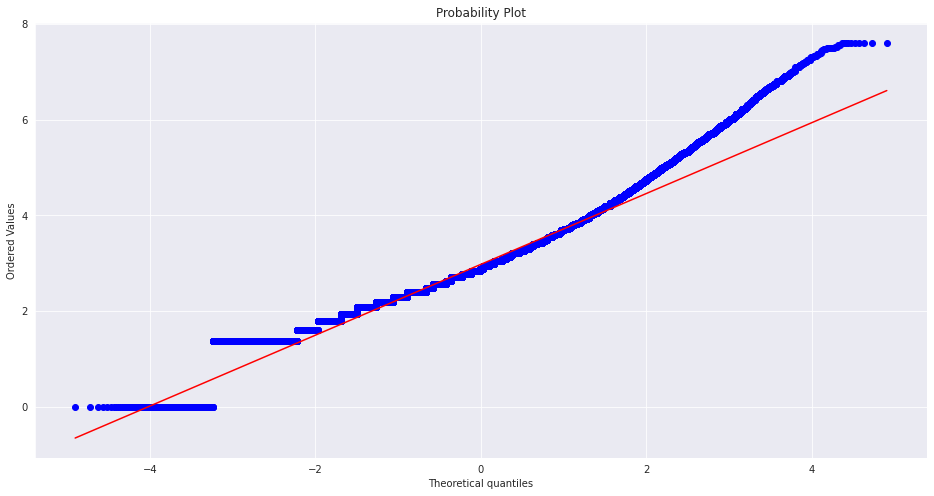

In [17]:
plt.figure(figsize=(16,8))
probplot(df_train['log_price'], dist="norm", plot=plt)
plt.show()

#### Observation: 
1. From QQ plot utput and comparing with  https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html, we can say above plot follows normal distribution. 
2. Therefore we can say the price is normally distributed.Lets test with box cox transformation and ploting QQ plot again

Reference : Notebook of https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/4173/code-walkthrough-probability-and-statistics-i/2/module-2-data-science-exploratory-data-analysis-and-data-visualization

0.1645736302320764


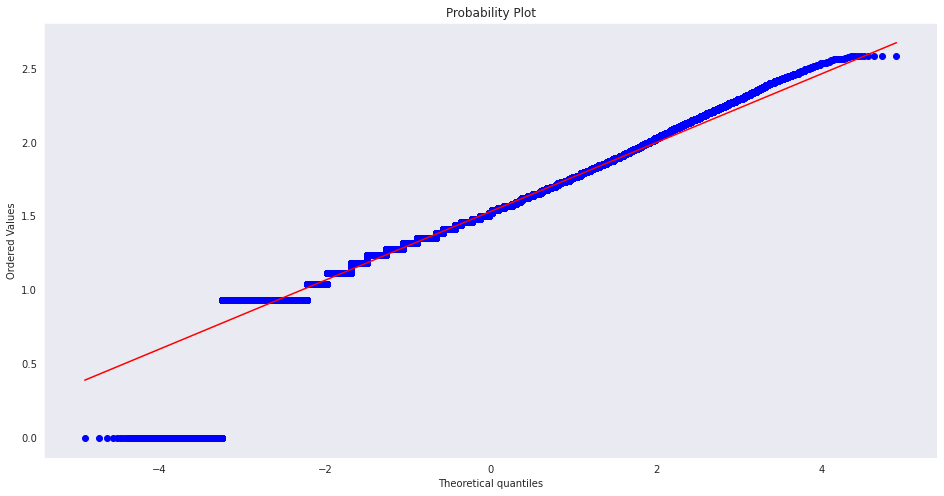

In [18]:
plt.figure(figsize=(16,8))
from scipy import stats
x_t, l = stats.boxcox(y_train+1) # l=lambda, x_t =x tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

In [19]:
kstest(x_t, 'norm')
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

KstestResult(statistic=0.8442332346734793, pvalue=0.0)

#### Observation: Since p value is less that 0.05, therefore we can ssy the distribution is normal

### EDA on item_condition

In [20]:
df_train["item_condition_id"].unique()

array([3, 1, 2, 4, 5])

#### From Train Variable Documentation reference
https://www.mercari.com/us/help_center/product-info/item-conditions/

#### New (1) - Like New (2) - Good (3) - Fair (4) - Poor (5)

#### Task: Count of Item by Condition

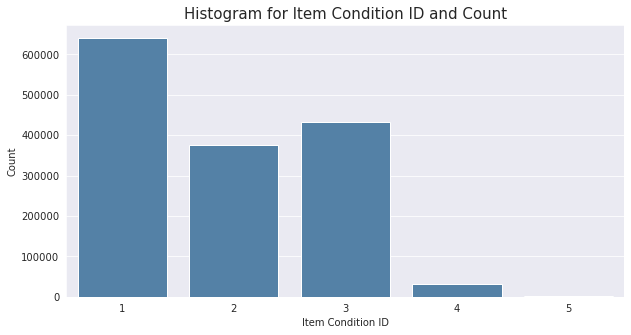

In [21]:
sn.set_style("darkgrid")
plt.figure(figsize=(10,5))
sn.barplot(x =df_train.item_condition_id.value_counts().index,
            y= df_train.item_condition_id.value_counts().values, color='steelblue')
plt.xlabel("Item Condition ID")
plt.ylabel("Count")
plt.title('Histogram for Item Condition ID and Count', fontsize = 15)
plt.show()

In [22]:
table = PrettyTable()
table.add_column("Category",df_train.item_condition_id.value_counts().index)
table.add_column("Count",df_train.item_condition_id.value_counts().values)
table.add_column("Percent(%)",np.round(df_train.item_condition_id.value_counts().values/df_train.shape[0]*100,2))
print(table)

+----------+--------+------------+
| Category | Count  | Percent(%) |
+----------+--------+------------+
|    1     | 640549 |   43.21    |
|    3     | 432161 |   29.15    |
|    2     | 375479 |   25.33    |
|    4     | 31962  |    2.16    |
|    5     |  2384  |    0.16    |
+----------+--------+------------+


#### Observation: 
1. The Cateory 1, 2 and 3 consists of New, New Like and Good conditions respectively. 
2. More than 90% items belongs to this category and very less in category 5 which is poor. 
3. Therefore we can say that large amount of product are either good or new condition 

#### Task: Influence of Price on Item Condition

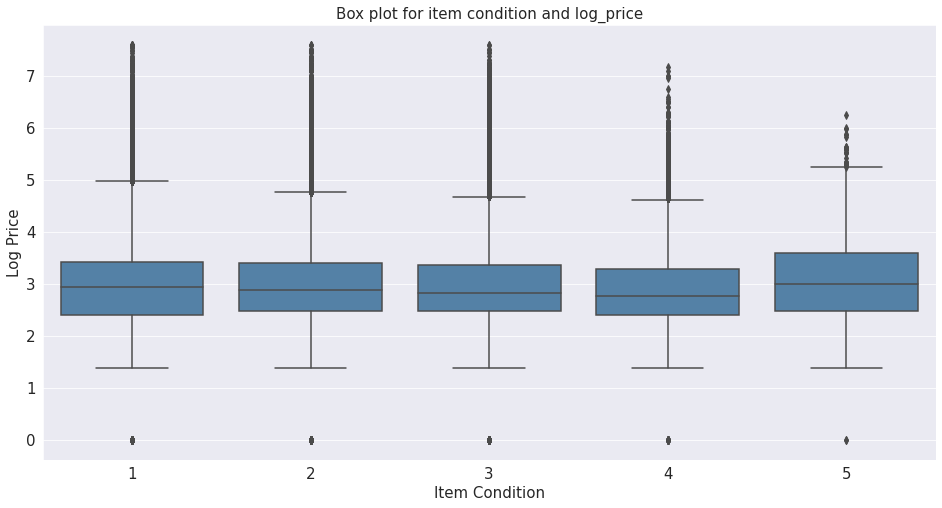

In [23]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
sn.boxplot(x = 'item_condition_id', y = 'log_price', data=df_train,color='steelblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Item Condition", fontsize=15)
plt.ylabel("Log Price", fontsize=15)
plt.title('Box plot for item condition and log_price', fontsize = 15)
plt.show()

                   train_id  item_condition_id     price  shipping  log_price
train_id           1.000000          -0.000113  0.000478  0.000472   0.000627
item_condition_id -0.000113           1.000000 -0.000807 -0.191154  -0.002073
price              0.000478          -0.000807  1.000000 -0.097211   0.738494
shipping           0.000472          -0.191154 -0.097211  1.000000  -0.229738
log_price          0.000627          -0.002073  0.738494 -0.229738   1.000000


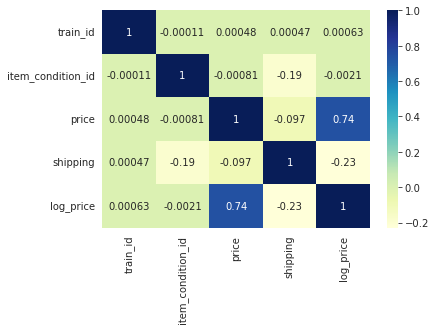

In [24]:
print(df_train.corr())
#df_train = df_train.drop(['price'], axis=1)
# plotting correlation heatmap
dataplot = sn.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

#### Observation : 
1. Only median value of category 5 is little higher wlse all median price are same range.
2. The median price of all category are in lower range.
3. The item condition are inversely proportional to price. As the item consition increases(1 being the best and 5 being poor) the price also decreases, which is true

### EDA on Shipping

In [25]:
df_train['shipping'].unique()

array([1, 0])

From dataset documentation:

shipping - 1 if shipping fee is paid by seller and 0 by buyer

#### Task : Percentage of Shipping paid by buyer or seller

In [26]:
(df_train['shipping'].value_counts())/len(df_train)*100

0    55.272557
1    44.727443
Name: shipping, dtype: float64

#### Observation : 
1. 55% cases shipping was paid by the buyer

#### Task: Influence of Price(target) on Shipping

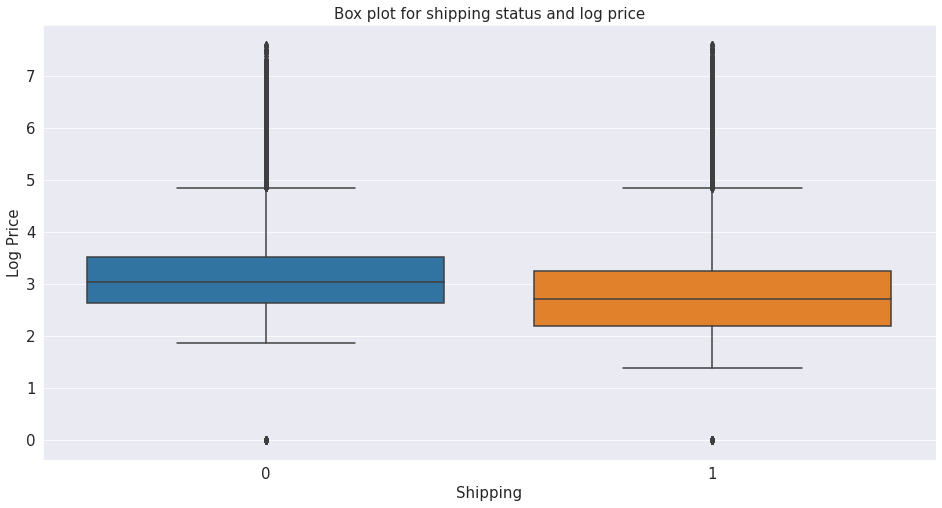

In [27]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
sn.boxplot(x = 'shipping', y = 'log_price', data=df_train)
plt.xlabel("Shipping", fontsize=15)
plt.ylabel("Log Price", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Box plot for shipping status and log price', fontsize = 15)
plt.show()

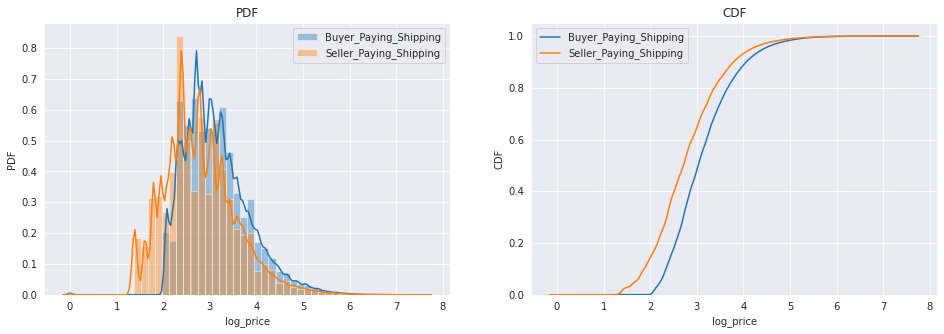

In [28]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sn.distplot(df_train[df_train.shipping==0]["log_price"],hist=True,label ="Buyer_Paying_Shipping")
sn.distplot(df_train[df_train.shipping==1]["log_price"],hist=True,label="Seller_Paying_Shipping")
plt.title("PDF")
plt.ylabel("PDF")
plt.legend()

plt.subplot(1,2,2)
sn.kdeplot(df_train[df_train.shipping==0]["log_price"],label ="Buyer_Paying_Shipping",cumulative=True)
sn.kdeplot(df_train[df_train.shipping==1]["log_price"],label="Seller_Paying_Shipping",cumulative=True)
plt.title("CDF")
plt.ylabel("CDF")
plt.legend()
plt.show()

#### Observation:
1. In most of items the price were paid by buyer. The CDF is right shifted and boxplot is slightly up compared to others.
2. The items which were the price was paid by seller is included in selling price which might increase the item price. Since there is not shipping price avialable so we can not do anything

### EDA on Brand Name



In [29]:
#From basic null and blank count check we found that there are null value present in brand name
df_brand_non_empty = df_train['brand_name'][~df_train['brand_name'].isnull()]
print("brand name with values: ", len(df_brand_non_empty)/len(df_train)*100, "%")

brand name with values:  57.32431274809701 %


#### Task: Top 10 and Least 10 occuring brands

In [30]:
df_brand_non_empty.value_counts()/(len(df_brand_non_empty))*100

PINK                    6.364395
Nike                    6.359100
Victoria's Secret       5.652272
LuLaRoe                 3.650514
Apple                   2.038235
                          ...   
The Learning Journey    0.000118
Pampers Baby Fresh      0.000118
Huggies One & Done      0.000118
Classic Media           0.000118
Kids Only               0.000118
Name: brand_name, Length: 4809, dtype: float64

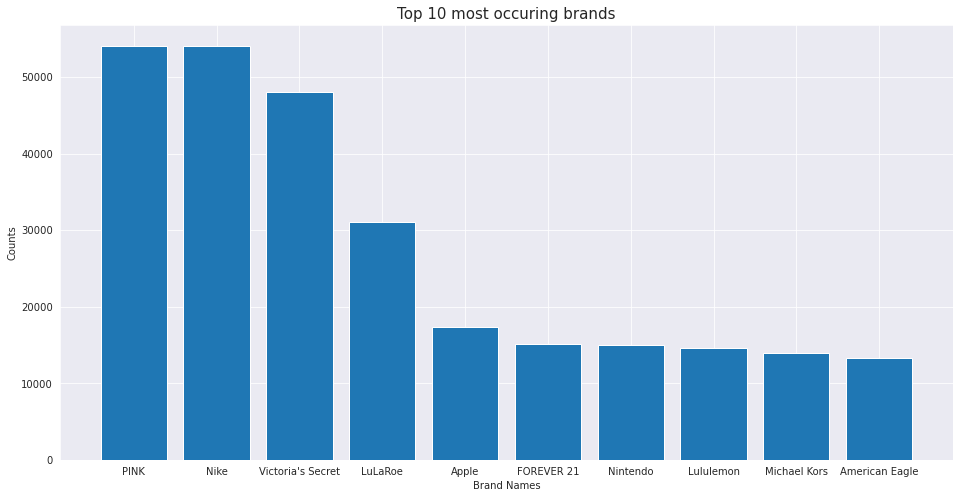

In [31]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
brands = list(df_brand_non_empty.value_counts()[:10].index)
counts = list(df_brand_non_empty.value_counts()[:10])
plt.xlabel('Brand Names', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.bar(brands, counts)
plt.title('Top 10 most occuring brands', fontsize=15)
plt.show()

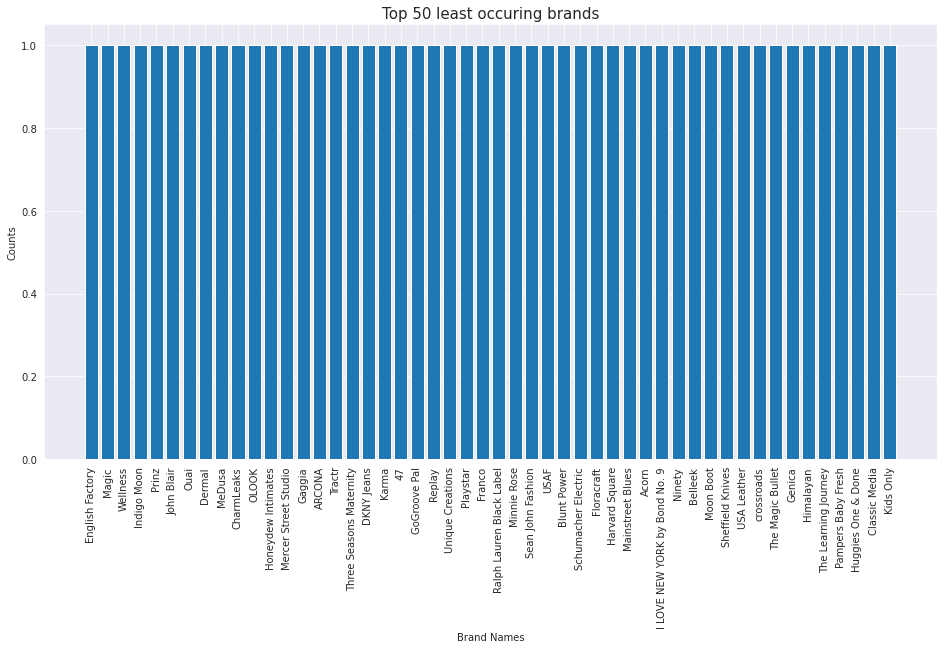

In [32]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
brands = list(df_brand_non_empty.value_counts()[-50:].index)
counts = list(df_brand_non_empty.value_counts()[-50:])
plt.xlabel('Brand Names', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.bar(brands, counts)
plt.title('Top 50 least occuring brands', fontsize=15)
plt.show()

#### Observation :
1. We can see PINK being most occuring brand with 70k times. 
2. There are also lot of items which occured only 1 time. If required group the items count for further analysis to check the items counts where item count is less than 10.

### Task: To find out the median price of top occuring items and comparing against the median price of entire dataset

In [33]:
brands = list(df_brand_non_empty.value_counts()[:10].index)

brand_median_prices = []
df_brand = df_train.groupby(['brand_name']).median()['log_price']
for brand in brands:
    brand_median_prices.append(df_brand[brand])

In [34]:
df_set_brand_non_empty = df_train[~df_train['brand_name'].isnull()]
#df_set_brand_non_empty
brand_non_empty = np.median(df_set_brand_non_empty['log_price'])

In [35]:
brands.append('median_price')
brand_median_prices.append(brand_non_empty)

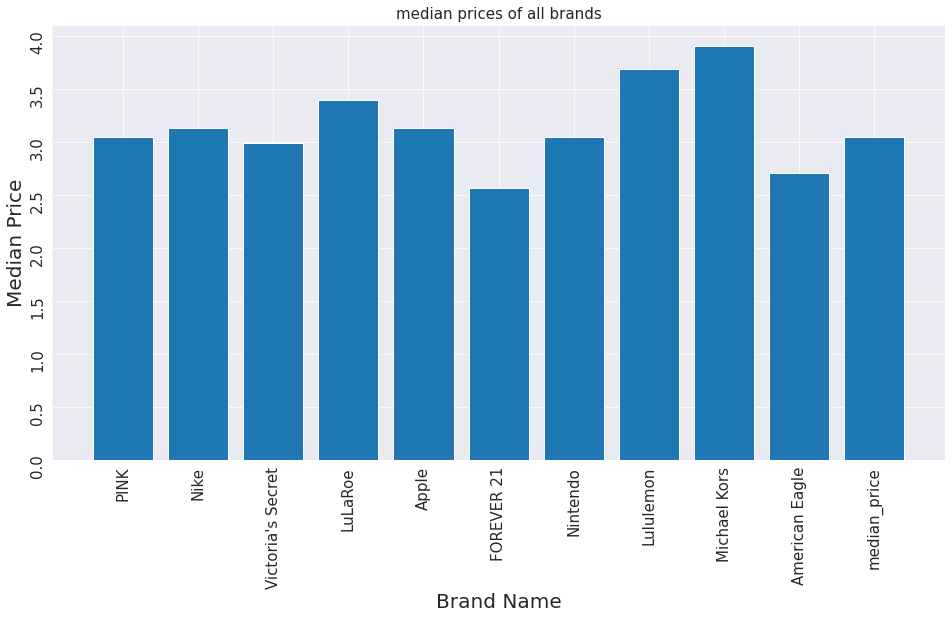

In [36]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.xlabel('Brand Name', fontsize=20)
plt.ylabel('Median Price', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=90)
plt.bar(brands, brand_median_prices)
plt.title('median prices of all brands', fontsize=15)
plt.show()

#### Observation:
1. We can see that nearly top 7 items have median price greater than overall median price.
2. Michael Kors, Lululemon and LuLaRoe have median price higher than overall products median price
3. Lets create box plot to find out more details

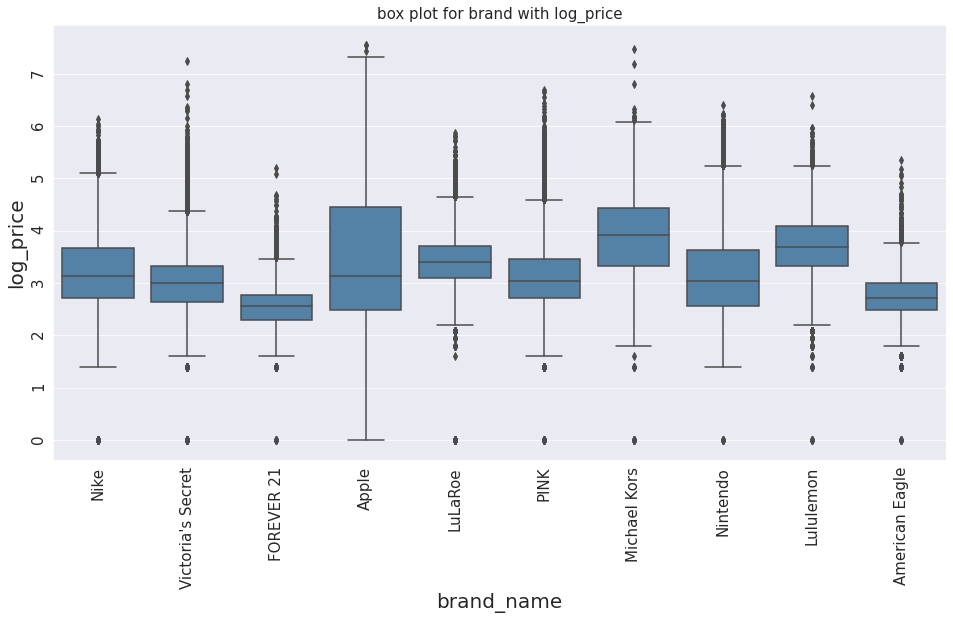

In [37]:
df_brands_bplot = df_train[df_train['brand_name'].isin(brands)]
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.xlabel('Brand Name', fontsize=20)
plt.ylabel('Median Price', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=90)
sn.boxplot(x = 'brand_name', y = 'log_price', data=df_brands_bplot,color = 'steelblue')
plt.title('box plot for brand with log_price', fontsize=15)
plt.show()

#### Observations:
1. Apple has large variance in the selling price while Forever 21 is sold in a very small price range.

#### Task: Top Costliest brand

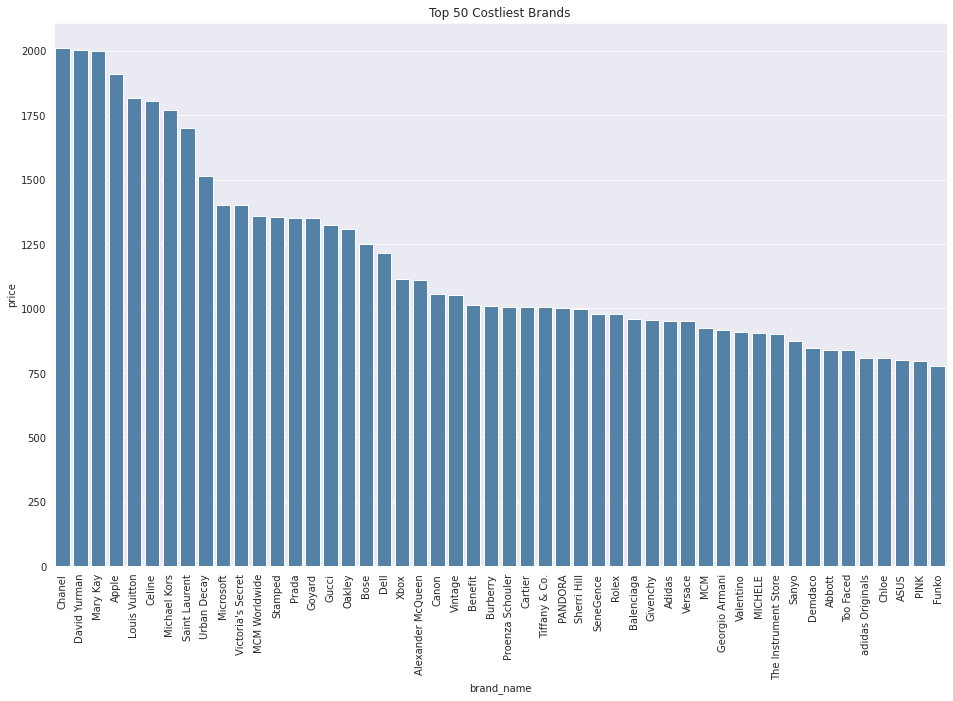

In [38]:
df_brand_grp = df_train[["brand_name","price"]].groupby(by="brand_name").max()
df_brand_grp = df_brand_grp.sort_values(by="price",ascending=False)
plt.figure(figsize=(16,10))
sn.barplot(x=df_brand_grp.index[:50],y= df_brand_grp.price[:50],color='steelblue')
plt.title("Top 50 Costliest Brands")
plt.xticks(rotation=90)
plt.show()

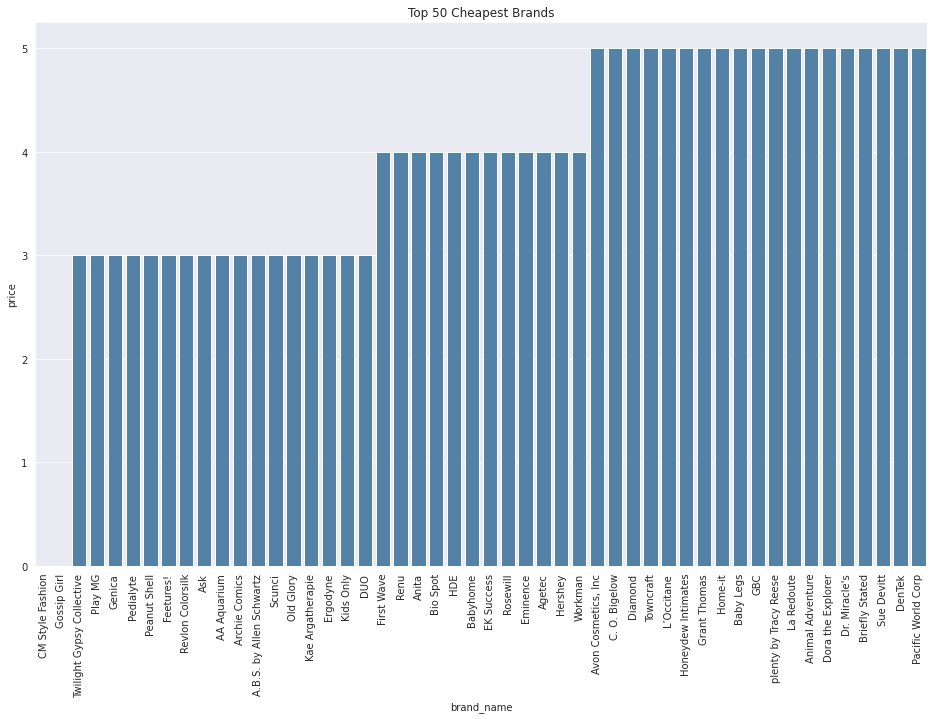

In [39]:
df_brand_grp = df_train[["brand_name","price"]].groupby(by="brand_name").max()
df_brand_grp = df_brand_grp.sort_values(by="price",ascending=True)

plt.figure(figsize=(16,10))
sn.barplot(x=df_brand_grp.index[:50],y= df_brand_grp.price[:50],color='steelblue')
plt.title("Top 50 Cheapest Brands")
plt.xticks(rotation=90)
plt.show()

#### Observation: 
1. The price of costliest brand is 2000 dollar and least price are 1 dollar.
2. There are some item which have zero price

#### Task: To find the influence of no and length of words in brand name

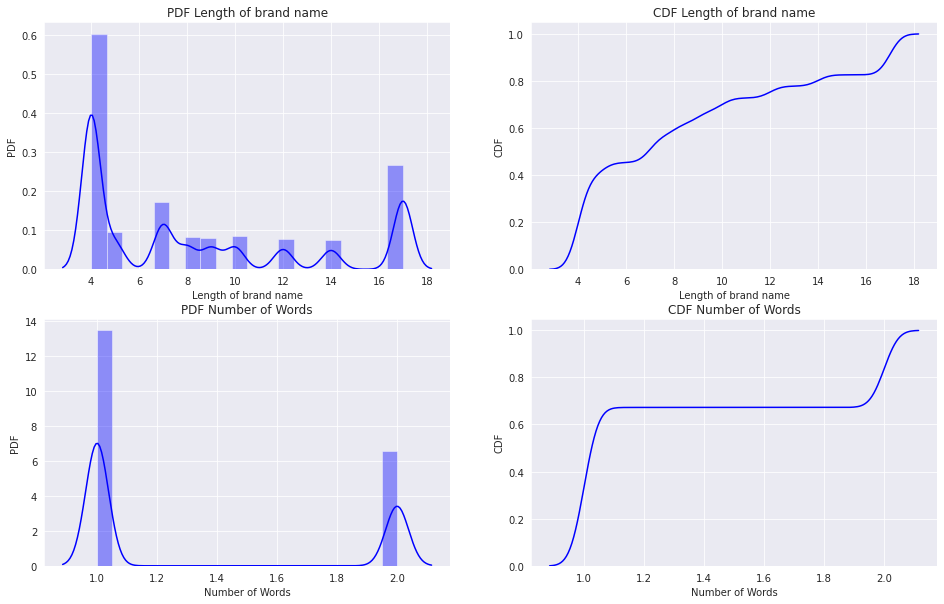

In [40]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sn.set_style("darkgrid")
sn.distplot(df_brands_bplot.brand_name.apply(len),color="blue",bins=20)
plt.title("PDF Length of brand name")
plt.xlabel("Length of brand name")
plt.ylabel("PDF")

plt.subplot(2,2,2)
sn.kdeplot(df_brands_bplot.brand_name.apply(len),color="blue",cumulative=True)
plt.title("CDF Length of brand name")
plt.xlabel("Length of brand name")
plt.ylabel("CDF")

plt.subplot(2,2,3)
sn.distplot(df_brands_bplot.brand_name.apply(lambda x: len(x.split())),color="blue",bins=20)
plt.title("PDF Number of Words")
plt.xlabel("Number of Words")
plt.ylabel("PDF")

plt.subplot(2,2,4)
sn.kdeplot(df_brands_bplot.brand_name.apply(lambda x: len(x.split())),color="blue",cumulative=True)
plt.xlabel("Number of Words")
plt.title("CDF Number of Words")
plt.ylabel("CDF")
plt.show()

#### Observation:
1. The majority of word is one word which covers 40 percentile and remaining 25 pecentile has 2 words
2. The 50 percentile of brand name has length of 10. 

### EDA on Category Name

In [41]:
df_train['category_name'].head()


0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
Name: category_name, dtype: object

#### Task :To find out most and least occuring category and sub category

Reference: https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling

In [42]:
def split_cat(text):
    try:
        return text.split("/")
    except:
        return ("No Label", "No Label", "No Label")
    
df_train['general_category'], df_train['subcategory_1'], df_train['subcategory_2'] = zip(*df_train['category_name'].
                                                                          apply(lambda x: split_cat(x)))
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_category,subcategory_1,subcategory_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


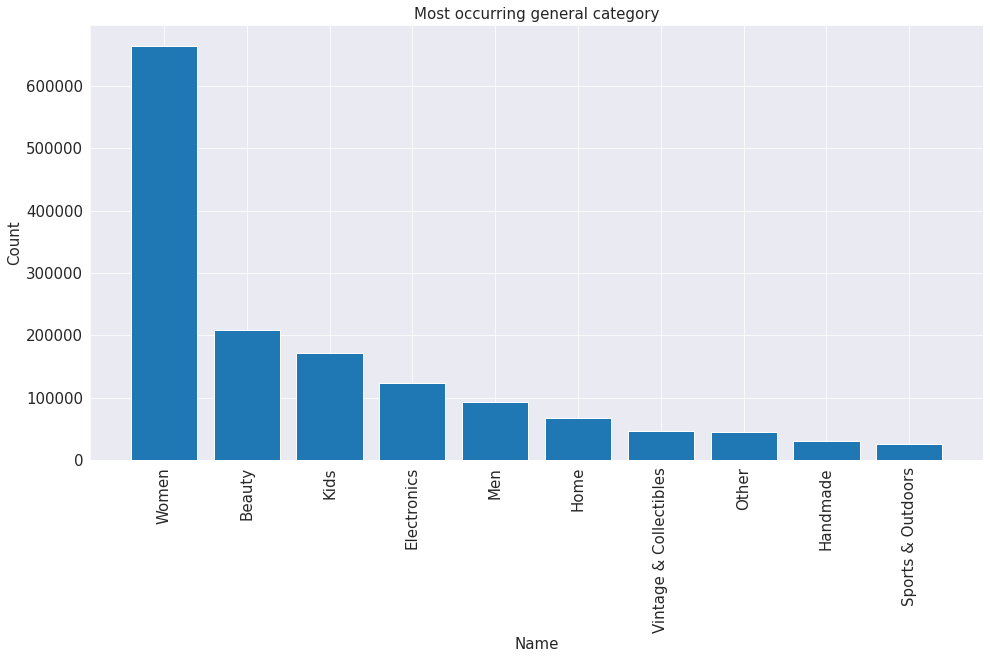

In [43]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
general_cat = list(df_train['general_category'].value_counts()[:10].index)
counts = list(df_train['general_category'].value_counts()[:10])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.bar(general_cat, counts)
plt.title('Most occurring general category', fontsize = 15)
plt.show()


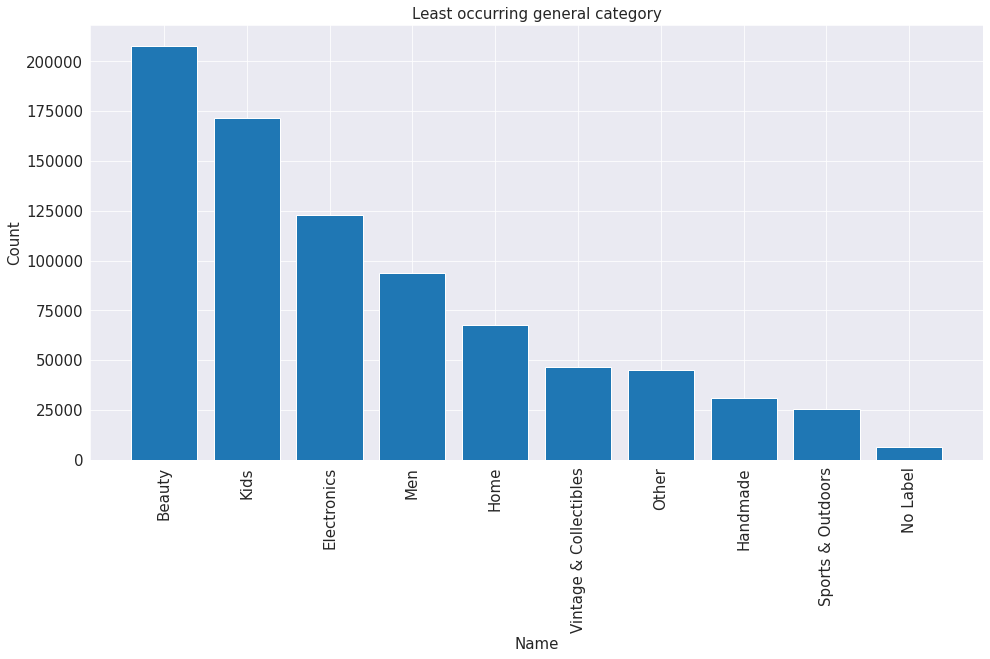

In [44]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
general_cat = list(df_train['general_category'].value_counts()[-10:].index)
counts = list(df_train['general_category'].value_counts()[-10:])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.bar(general_cat, counts)
plt.title('Least occurring general category', fontsize = 15)
plt.show()

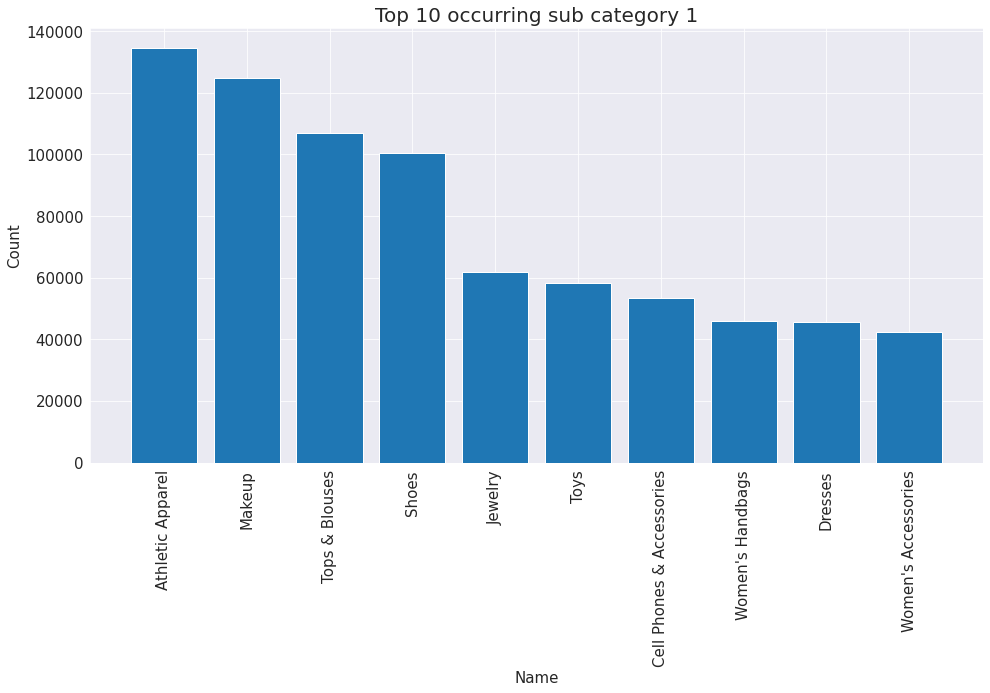

In [45]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
sub_cat_1 = list(df_train['subcategory_1'].value_counts()[:10].index)
counts = list(df_train['subcategory_1'].value_counts()[:10])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.bar(sub_cat_1, counts)
plt.title('Top 10 occurring sub category 1', fontsize = 20)
plt.show()

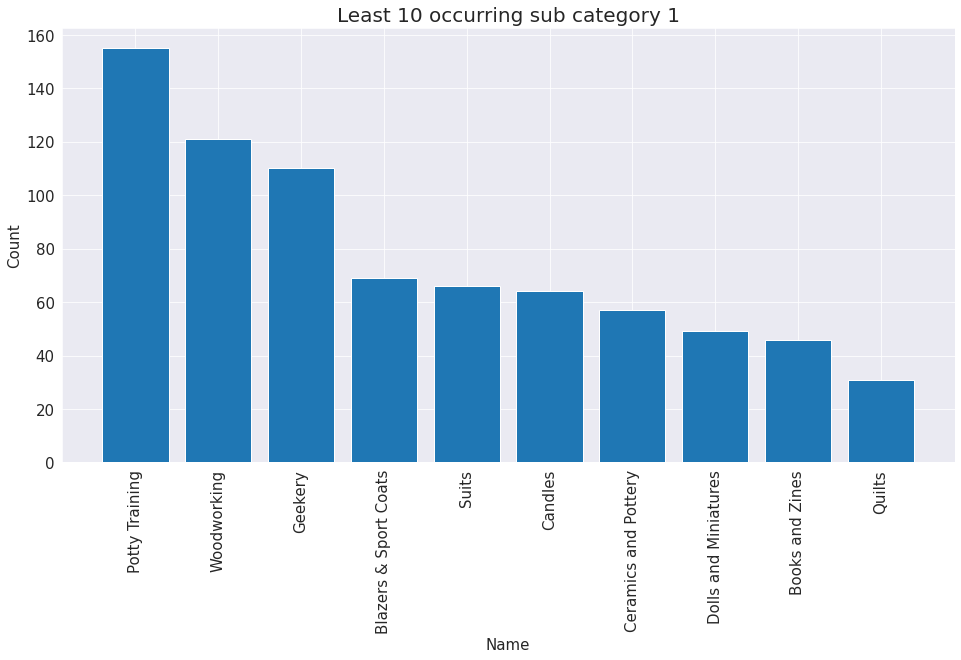

In [46]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
sub_cat_1 = list(df_train['subcategory_1'].value_counts()[-10:].index)
counts = list(df_train['subcategory_1'].value_counts()[-10:])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.bar(sub_cat_1, counts)
plt.title('Least 10 occurring sub category 1', fontsize = 20)
plt.show()

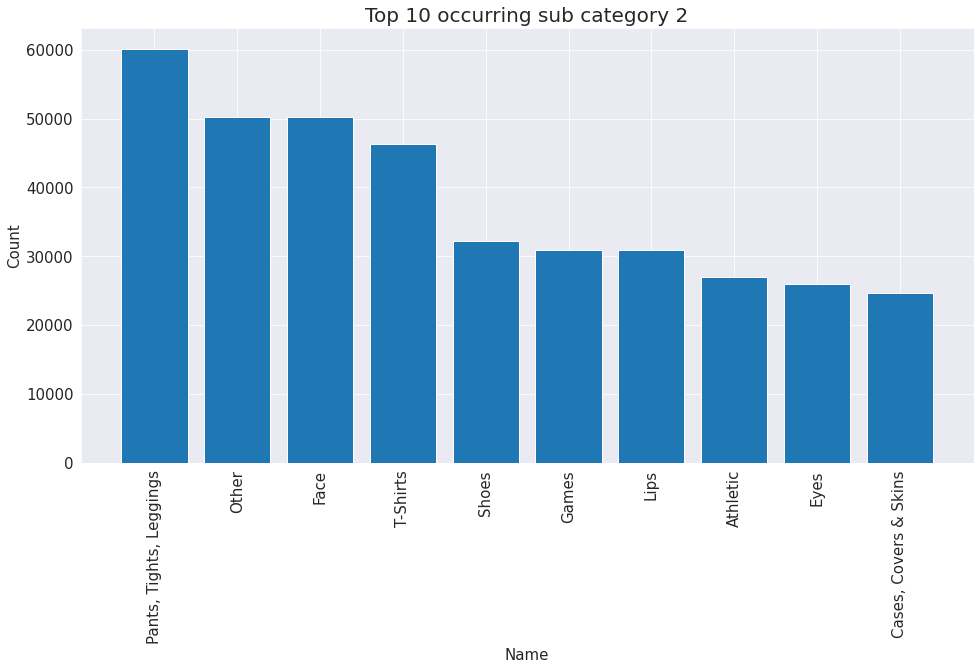

In [47]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
sub_cat_2 = list(df_train['subcategory_2'].value_counts()[:10].index)
counts = list(df_train['subcategory_2'].value_counts()[:10])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.bar(sub_cat_2, counts)
plt.title('Top 10 occurring sub category 2', fontsize = 20)
plt.show()

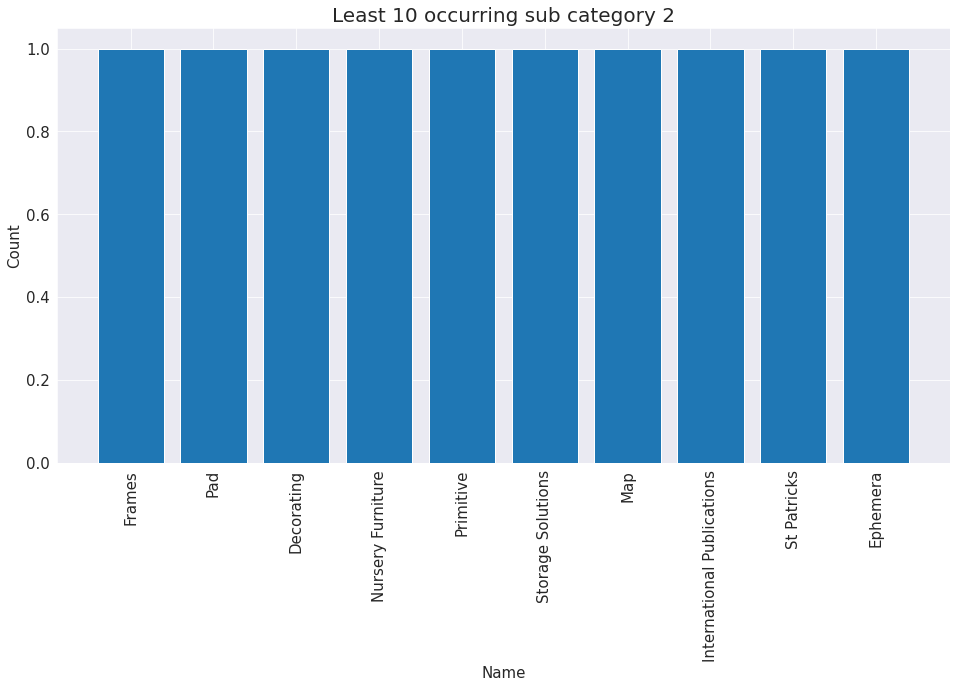

In [48]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
sub_cat_2 = list(df_train['subcategory_2'].value_counts()[-10:].index)
counts = list(df_train['subcategory_2'].value_counts()[-10:])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.bar(sub_cat_2, counts)
plt.title('Least 10 occurring sub category 2', fontsize = 20)
plt.show()

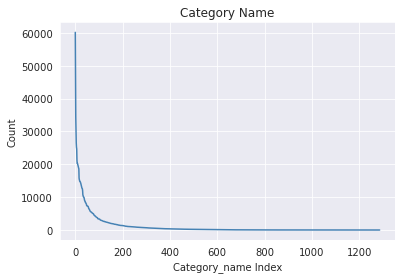

In [49]:
#Frequency and Index of Category Name
sn.set_style("darkgrid")
sn.lineplot(x =range(len(df_train.category_name.value_counts())),
             y=df_train.category_name.value_counts().values,color='steelblue')
plt.title("Category Name")
plt.xlabel("Category_name Index")
plt.ylabel("Count")
plt.show()

#### Observation:
1. There are total 1200+ categories.
2. Woman dominates in all the categories and there are some category which dows not have labels.
3. There are 11 items in general category.
4. There are lot of items with count 1 in sub category 2 which means these are not purchased by people most.
3. The product categories are heirarchical and have three levels seperated by "/".

#### Task : To find impact of price(target variable) with general category

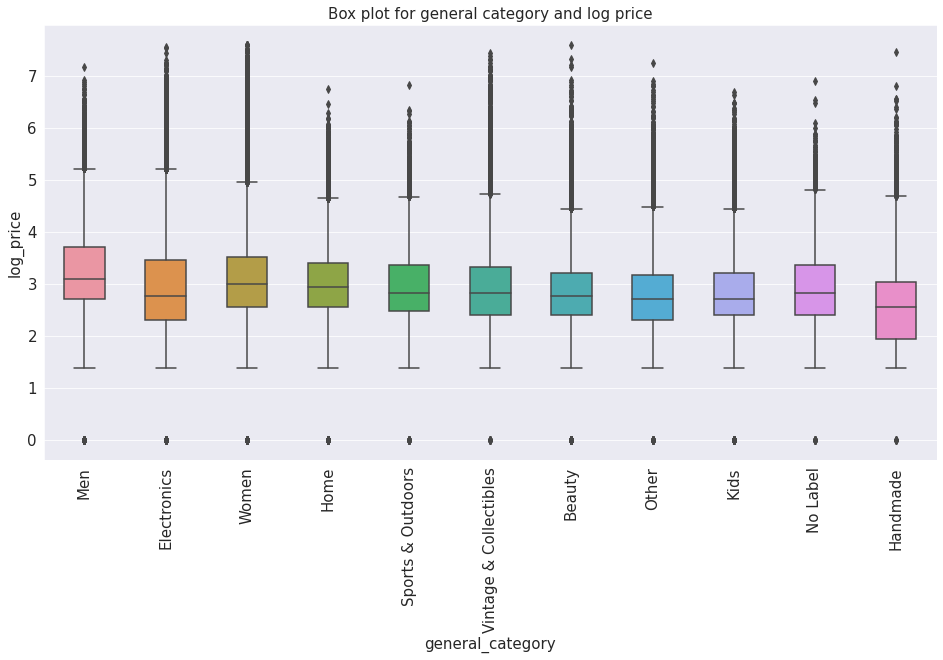

In [50]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
general_cat = list(df_train['general_category'].value_counts().index)
plt.xlabel("general_category", fontsize=15)
plt.ylabel("log_price", fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
sn.boxplot(x = 'general_category', y = 'log_price', data=df_train, width=0.5)
plt.title('Box plot for general category and log price', fontsize = 15)
plt.show()

#### Observation:
1. There is not much variations in prices across general category.
2. The mens product have slightly larger median price than other category.
3. The handmade product have slightly smaller median price than other category.
4. There is large variation of price in Electronics and Homemage items


#### EDA on Item Name

### Task : To preprocess the data by removing the stop words, special charecters and build wordcloud

Reference: https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling

Building WordCloud: https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

In [7]:
#https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling
stop = set(stopwords.words('english'))

def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    
    # remove punctuation
    text = regex.sub(" ", text)
    
    #removing special characters
    text = re.sub('[\W_]+', ' ', text) 
    
    tokens_orig = [word_tokenize(s) for s in sent_tokenize(text)]
    
    tokens = []
    
    for token_by_sent in tokens_orig:
        tokens += token_by_sent
    
    tokens = list(filter(lambda t: t.lower() not in stop, tokens))
    
    filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    
    filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
    return filtered_tokens

In [52]:
# create unigram by tokenizing
df_train['unigram_tokens'] = df_train['name'].map(tokenize)


In [53]:
df_train['unigram_tokens']

0           [mlb, cincinnati, reds, shirt, size]
1          [razer, blackwidow, chroma, keyboard]
2                             [ava, viv, blouse]
3                      [leather, horse, statues]
4                           [gold, plated, rose]
                           ...                  
1482530          [free, people, inspired, dress]
1482531       [little, mermaid, handmade, dress]
1482532     [day, fix, containers, eating, plan]
1482533               [world, markets, lanterns]
1482534         [brand, new, lux, ville, wallet]
Name: unigram_tokens, Length: 1482535, dtype: object

In [54]:
list_unigrams = list(df_train['unigram_tokens'])

In [55]:
#Flatten the unigram list
list_unigrams_flattened = []
for sublist in list_unigrams:
    if sublist is not None:
        for item in sublist:
            list_unigrams_flattened.append(item)

In [56]:
#Reference https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

In [57]:
unigrams_name = ' '.join(list_unigrams_flattened)

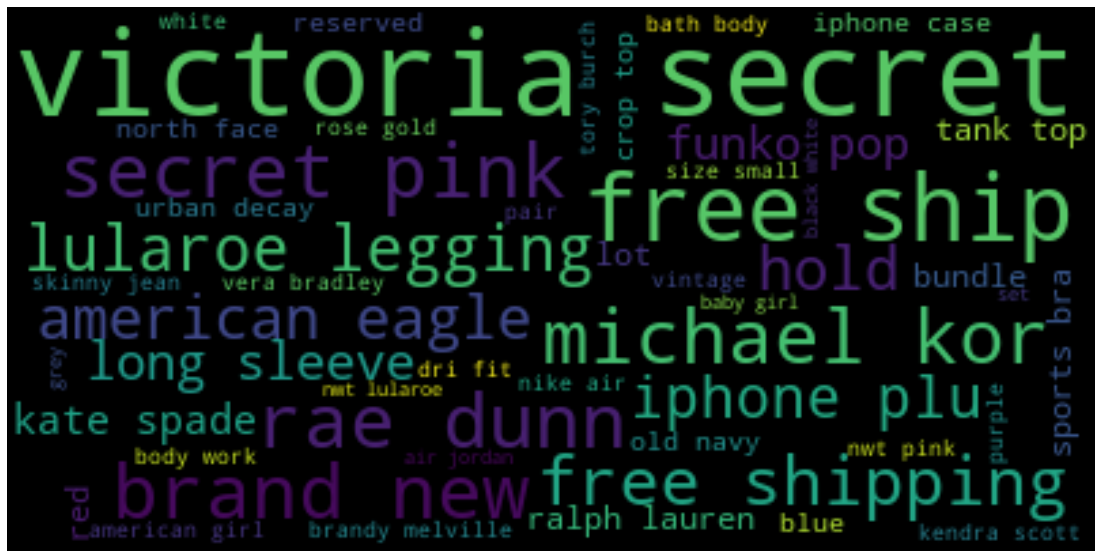

In [58]:
#Reference : https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
plt.figure(figsize=(32,10))
wordcloud = WordCloud(background_color='black',
                      max_words=50,
                      max_font_size=150,
                      random_state=42).generate(unigrams_name)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#### Observations:
1. Victoria and Secret are most occurring brand 
2. This is followed by Michael, Kor, Apple and iPhone which also occur frequently. 
3. The word "free shipping", "brand new" are frequently used texts.
4. From earlier analysis most occuring brand name is one word which is followed by two words.

#### EDA on Item Name

In [8]:
# apply the tokenizer into the item name column
df_train['unigram_tokens_item_desc'] = df_train['item_description'].apply(str).map(tokenize)

In [22]:
df_train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,unigram_tokens_item_desc,item_desc_length,log_price
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,"[description, yet]",0,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,"[keyboard, great, condition, works, like, came...",0,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,"[adorable, top, hint, lace, key, hole, back, p...",0,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,"[new, tags, leather, horses, retail, stand, fo...",0,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,"[complete, certificate, authenticity]",0,3.806662
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...","[lace, says, size, small, fits, medium, perfec...",0,3.044522
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,"[little, mermaid, handmade, dress, never, worn...",0,2.708050
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.","[used, twice, still, great, shape]",0,2.564949
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,"[one, see, red, orange, big, red, orange, ones...",0,3.828641


In [10]:
list_unigrams_idesc = list(df_train['unigram_tokens_item_desc'])

In [11]:
list_unigrams_flattened_idesc = []
for sublist in list_unigrams_idesc:
    if sublist is not None:
        for item in sublist:
            list_unigrams_flattened_idesc.append(item)

In [12]:
unigrams_name_idesc = ' '.join(list_unigrams_flattened_idesc)

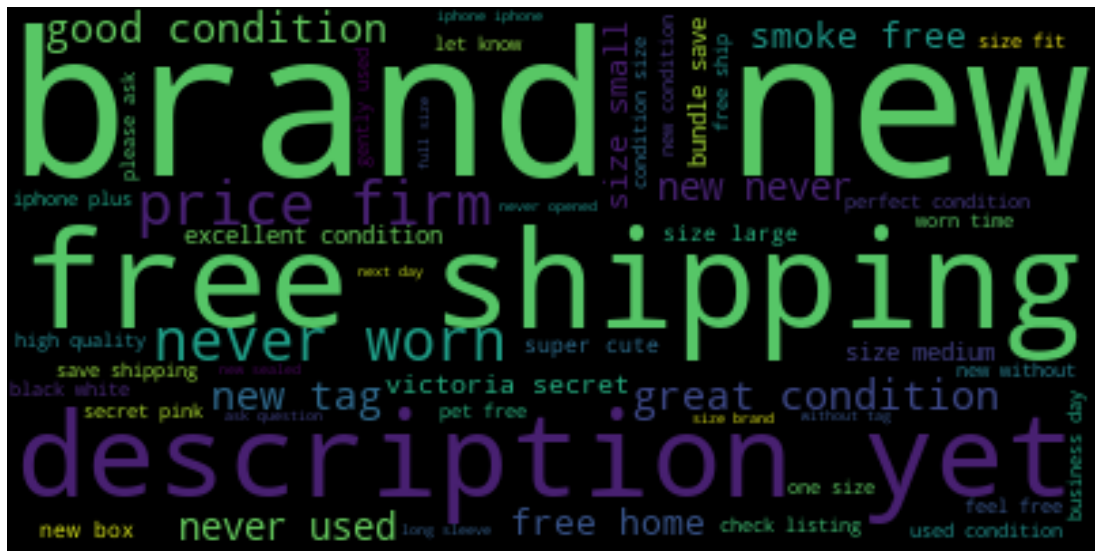

In [13]:
#Reference : https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
plt.figure(figsize=(32,10))
wordcloud = WordCloud(background_color='black',
                      max_words=50,
                      max_font_size=150,
                      random_state=42).generate(unigrams_name_idesc)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#### Observations:
1. Words like brand, new, free, shipping, great, condition are used to frequently in item description

#### Task : Influence of Length of item description on price

In [31]:
df_train['item_desc_length'] = df_train['item_description'].apply(lambda x:len(str(x)))

In [32]:
max(df_train['item_desc_length'])

1046

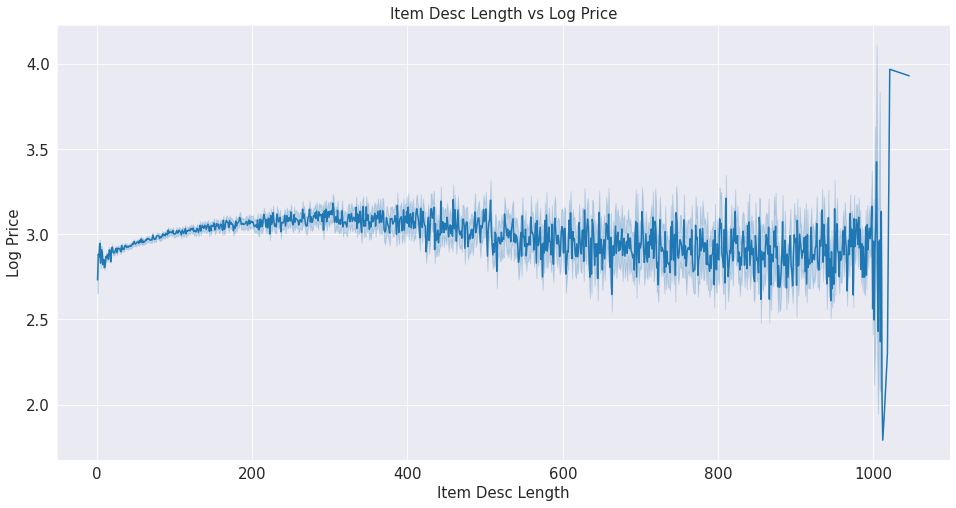

In [33]:
sn.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.xlabel('Item Desc Length', fontsize = 15)
plt.ylabel('Log Price', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Item Desc Length vs Log Price', fontsize = 15)
sn.lineplot(x='item_desc_length', y='log_price', data=df_train)
plt.show()

In [34]:
#### Observations:
1. Short description item have a lower price.
2. Items with higher price have a larger description length but not always.



SyntaxError: invalid syntax (2160237911.py, line 2)